In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import recall_score,precision_score,f1_score,confusion_matrix,roc_auc_score,roc_curve,classification_report


In [2]:
DATA_JSON_FILE = 'SpamData/01_Processing/email-text-data.json'

In [3]:
data = pd.read_json(DATA_JSON_FILE)

In [4]:
data.tail()

,CATEGORY,MESSAGE,FILE_NAME
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0
5795,0,"If you run Pick, and then use the ""New FTOC"" b...",00747.352d424267d36975a7b40b85ffd0885e


In [5]:
data.shape

(5796, 3)

In [6]:
#For Sorting index in ascending order
data.sort_index(inplace = True)

In [7]:
vectorizer = CountVectorizer(stop_words='english')

In [8]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [9]:
all_features = vectorizer.fit_transform(data.MESSAGE)

In [10]:
all_features.shape

(5796, 102694)

In [11]:
vectorizer.vocabulary_

{'dear': 32719,
 'homeowner': 48034,
 'rates': 76350,
 'lowest': 59365,
 'point': 72297,
 '40': 7824,
 'years': 98506,
 'help': 47200,
 'best': 23129,
 'rate': 76347,
 'situation': 82318,
 'matching': 60930,
 'needs': 64750,
 'hundreds': 48607,
 'lenders': 58021,
 'home': 48006,
 'improvement': 51399,
 'refinance': 77074,
 'second': 80968,
 'mortgage': 63026,
 'equity': 38990,
 'loans': 59058,
 'perfect': 70478,
 'credit': 30975,
 'service': 81359,
 '100': 1496,
 'free': 42773,
 'owners': 68715,
 'new': 64988,
 'buyers': 25617,
 'obligation': 66813,
 'just': 55049,
 'quick': 75547,
 'simple': 82172,
 'form': 42425,
 'jump': 55000,
 'start': 84135,
 'future': 43330,
 'plans': 71939,
 'today': 88039,
 'visit': 92921,
 'http': 48497,
 '61': 10092,
 '145': 2275,
 '116': 1873,
 '186': 2748,
 'user0201': 91339,
 'index': 51639,
 'asp': 20429,
 'afft': 17606,
 'qm10': 75108,
 'unsubscribe': 90955,
 'light': 58472,
 'watch': 94281,
 'attention': 20740,
 'computer': 29755,
 'users': 91367,
 'sp

In [12]:
#Train,Test and Split
X_train , X_test , y_train ,y_test = train_test_split(all_features , data.CATEGORY , 
                                                     test_size = 0.3 , random_state = 88)

In [13]:
X_train.shape

(4057, 102694)

In [14]:
X_test.shape

(1739, 102694)

In [15]:
classifier = MultinomialNB()

In [43]:
classifier.fit(X_train , y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Evaluation

In [17]:
#The Number of documents classified correctly
num_correct = (y_test == classifier.predict(X_test)).sum()
print(f'{num_correct} are the correctly classified documents')

1660 are the correctly classified documents


In [18]:
#The number of documents classified incorrectly
num_incorrect = y_test.size - num_correct
print(f'{num_incorrect} are the incorrectly classified documents')

79 are the incorrectly classified documents


In [19]:
fraction_wrong = num_incorrect / (num_correct + num_incorrect)
print(f'The accuracy of the model is {(1-fraction_wrong):.2%}')

The accuracy of the model is 95.46%


In [20]:
accuracy = num_correct / y_test.size
print(f'The accuracy of model is {accuracy:.2%}')

The accuracy of model is 95.46%


In [21]:
classifier.score(X_test , y_test)

0.9545715928694652

In [22]:
predict = classifier.predict(X_test)

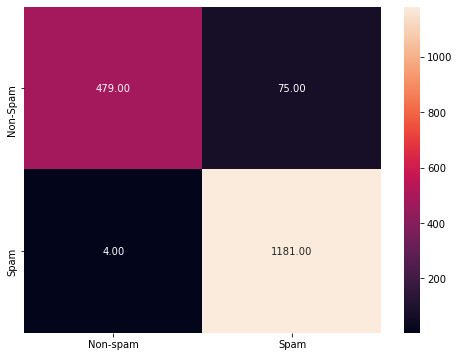

In [23]:
cm = confusion_matrix(y_test , predict , [1,0])
plt.figure(figsize=(8,6))
sn.heatmap(cm , annot = True , fmt ='.2f',xticklabels=['Non-spam' , 'Spam'] ,
           yticklabels=['Non-Spam', 'Spam'])
plt.show()

In [24]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1185
           1       0.99      0.86      0.92       554

    accuracy                           0.95      1739
   macro avg       0.97      0.93      0.95      1739
weighted avg       0.96      0.95      0.95      1739



In [25]:
#recall score
recall_score(y_test , classifier.predict(X_test))

0.8646209386281588

In [26]:
#precision score
precision_score(y_test , classifier.predict(X_test))

0.9917184265010351

In [27]:
#f-1 score
f1_score(y_test , classifier.predict(X_test))

0.9238187078109932

In [28]:
auc = roc_auc_score(y_test,predict)

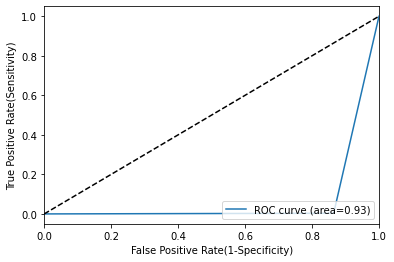

In [29]:
fpr , tpr , threshold = roc_curve(y_test,predict)

plt.plot(tpr,fpr,label='ROC curve (area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc='lower right')
plt.xlim([0.0,1.0])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.show()

## KNN Algorithm


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
klf = KNeighborsClassifier()
klf.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

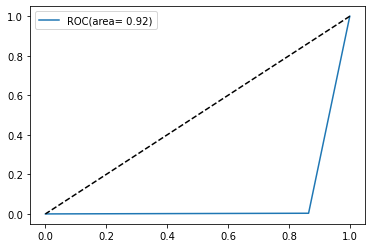

In [48]:
predict_knn = klf.predict(X_test)
auc_knn =roc_auc_score(y_test , predict_knn)
fpr_1 , tpr_1 , threshold_1 = roc_curve(y_test , predict_knn)
plt.plot(tpr, fpr , label ="ROC(area= %0.2f)"%auc_knn )
plt.plot([1,0],[1,0] , 'k--')
plt.legend()
plt.show()

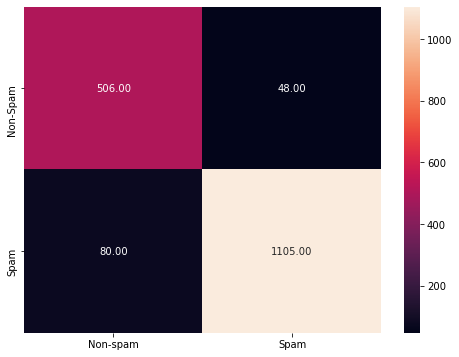

In [33]:
conf = confusion_matrix(y_test,predict_knn,[1,0])
plt.figure(figsize=(8,6))
sn.heatmap(conf,annot=True , fmt='.2f' ,xticklabels=['Non-spam' , 'Spam'] ,
           yticklabels=['Non-Spam', 'Spam'])
plt.show()

### Grid search CV for optimum hyperparameters

In [34]:
tuned_params = [{'n_neighbors':range(5,10) , 'metric':['canberra' , 'euclidean' ,'minkowski']}]

grid_search = GridSearchCV(KNeighborsClassifier(),tuned_params , cv=10 , scoring='roc_auc')

In [35]:
grid_search.fit(X_train,y_train)

C:\Users\Nandushreyas\anaconda3\envs\Python\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'canberra' not valid for sparse input. Use sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\Nandushreyas\anaconda3\envs\Python\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'canberra' not valid for sparse input. Use sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\Nandushreyas\anaconda3\envs\Python\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Es

C:\Users\Nandushreyas\anaconda3\envs\Python\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'canberra' not valid for sparse input. Use sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\Nandushreyas\anaconda3\envs\Python\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'canberra' not valid for sparse input. Use sorted(sklearn.neighbors.VALID_METRICS_SPARSE['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\Nandushreyas\anaconda3\envs\Python\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Es

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(5, 10)}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [36]:
grid_search.best_score_

0.9697225344948797

In [37]:
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [38]:
predict_grid = grid_search.predict(X_test)

In [39]:
print(classification_report(y_test , predict_grid))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1185
           1       0.86      0.91      0.89       554

    accuracy                           0.93      1739
   macro avg       0.91      0.92      0.92      1739
weighted avg       0.93      0.93      0.93      1739



In [40]:
# Checking on our Own Example
example = ['Hello , want free viagra?', 
          'need a mortgage? Reply to arrange a call with a specialist and get a quote',
          ' Payment Protection Insurance (PPI) IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.',
          'Accident compensationYou have still not claimed the compensation you are due for the accident you had. To start the process please reply YES. To opt out text STOP' ,
          'Debt forgiveness.Due to a new legislation, those struggling with debt can now apply to have it written off. For more information text the word INFO or to opt out text STOP' , 
          'Sachin Ramesh Tendulkar born 24 April 1973) is an Indian former international cricketer and a former captain of the Indian national team. He is widely regarded as one of the greatest batsmen in the history of cricket.[5] He is the highest run scorer of all time in International cricket.Tendulkar took up cricket at the age of eleven, made his Test debut on 15 November 1989 against Pakistan in Karachi at the age of sixteen, and went on to represent Mumbai domestically and India internationally for close to twenty-four years. He is the only player to have scored one hundred international centuries, the first batsman to score a double century in a One Day International (ODI), the holder of the record for the most runs in both Test and ODI, and the only player to complete more than 30,000 runs in international cricket.[6] He is colloquially known as Little Master or Master Blaster'
          ]

In [41]:
doc_term_matrix = vectorizer.transform(example)

In [42]:
classifier.predict(doc_term_matrix)

array([1, 1, 1, 0, 1, 0], dtype=int64)